# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [44]:
import sympy as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from collections import defaultdict

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
dataframe = {'': ['Country A','Country B'], 'Saving(s)': [0.25, 0.35], 'Depriciation(δ)': [0.05, 0.04], 'Population growth(n)': [0.02, 0.01], 'Capital share(α)': [0.33, 0.40], 'Capital per worker(k_0)': [1.0, 0.8]}

df = pd.DataFrame(dataframe)

print(df)

              Saving(s)  Depriciation(δ)  Population growth(n)  \
0  Country A       0.25             0.05                  0.02   
1  Country B       0.35             0.04                  0.01   

   Capital share(α)  Capital per worker(k_0)  
0              0.33                      1.0  
1              0.40                      0.8  


# Model description

We will use the Solow Growth model in this assignment
The Solow Growth model is an exogenous model for economic growth, which analyzes changes in the level of output over time in an economy as a result of changes in the savings rate, population growth and the rate of technology. 

Assuming a Cobb-Douglas production function and a constant total factor productivity (i.e. A=1)

You can see the relevant equations we will use below, where k* and y* are steady state 

$$y_{t+1}=A\cdot k^\alpha_{t+1}$$

$$k_{t+1}=k_t+s\cdot y_t-(\delta+n)\cdot k_t$$

$$k^*=\frac{s\cdot A}{\delta+n}^{\frac{1}{1-\alpha}}$$

$$y^*=A\cdot k^\alpha$$

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

We plot the Solow Growth model for Country A and B with their respective steady state values. 

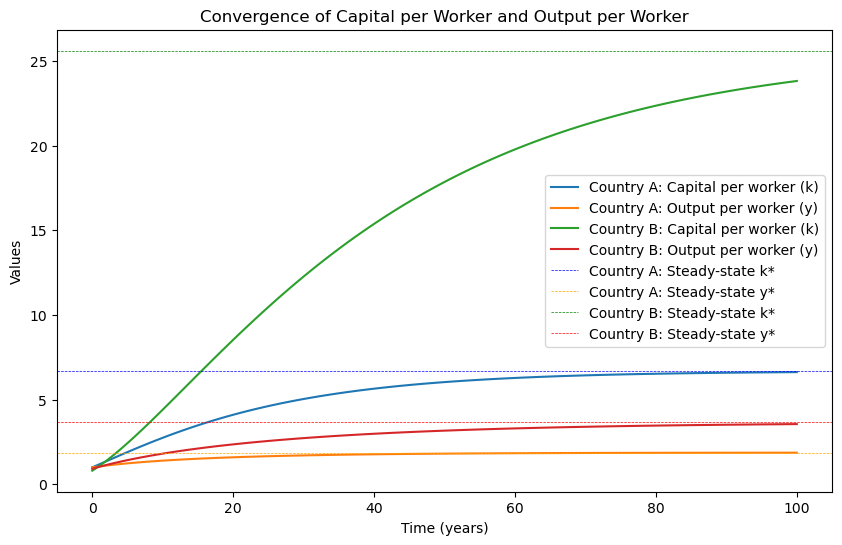

In [2]:
plt.figure(figsize=(10, 6))

#we create labels to the plot:
plt.plot(mp.k_A, label="Country A: Capital per worker (k)")
plt.plot(mp.y_A, label="Country A: Output per worker (y)")
plt.plot(mp.k_B, label="Country B: Capital per worker (k)")
plt.plot(mp.y_B, label="Country B: Output per worker (y)")

#We give specification to the lines, what they should show, color, label and linewidth 
plt.axhline(y=mp.steady_state_A[0], color='blue', linestyle='--', label="Country A: Steady-state k*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_A[1], color='orange', linestyle='--', label="Country A: Steady-state y*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_B[0], color='green', linestyle='--', label="Country B: Steady-state k*", linewidth = '0.5')
plt.axhline(y=mp.steady_state_B[1], color='red', linestyle='--', label="Country B: Steady-state y*", linewidth = '0.5')

#We give titles to the y- and x-axis:
plt.xlabel("Time (years)")
plt.ylabel("Values")

#We give title to the plot
plt.title("Convergence of Capital per Worker and Output per Worker")
plt.legend()
plt.show()

Explanation of plot


Introduction to the next plot

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mp.s_values, mp.k_star_values_A, label="Country A: Steady-state capital per worker (k*)")
plt.plot(mp.s_values, mp.y_star_values_A, label="Country A: Steady-state output per worker (y*)")
plt.xlabel("Savings Rate (s)")
plt.ylabel("Steady-state Values")
plt.title("Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Savings Rate")
plt.legend()
plt.show()

Explanation of the plot

Introduction to the next plot

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mp.delta_values_specific, mp.k_star_values_A_delta_specific, label="Country A: Steady-state capital per worker (k*)", marker="o")
plt.plot(mp.delta_values_specific, mp.y_star_values_A_delta_specific, label="Country A: Steady-state output per worker (y*)", marker="o")
plt.xlabel("Depreciation Rate (δ)")
plt.ylabel("Steady-state Values")
plt.title("Sensitivity Analysis of Steady-state Capital per Worker and Output per Worker to Depreciation Rate for Country A")
plt.legend()
plt.show()

Explanation of the plot

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [4]:
#Printing the steady state values for country A and B with three decimals 
print(f"Country A: k* = {mp.steady_state_A[0]:.3f}, y* = {mp.steady_state_A[1]:.3f}") # If wondering 0 V 1 are indexes for k and y
print(f"Country B: k* = {mp.steady_state_B[0]:.3f}, y* = {mp.steady_state_B[1]:.3f}")

Country A: k* = 6.686, y* = 1.872
Country B: k* = 25.615, y* = 3.659


In [5]:
if mp.catch_up_time is not None:
    print(f"Country B will catch up with Country A in terms of income per worker in {mp.catch_up_time} years.")
else:
    print("Country B will not catch up with Country A in terms of income per worker within the simulated time period.")


Country B will catch up with Country A in terms of income per worker in 2 years.


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 